In [37]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import requests
import pickle

from config import ALL, TW0050, Tech, Fin, Slope

pd.set_option('display.max_columns', None)

In [38]:

stock_period = ('2010/01/01','2021/12/31')

# experiments
Portfolio = TW0050
# Portfolio = Slope
name = Portfolio['name']


In [3]:
stock_df=[]
for stock in Portfolio['portfolio']: 
    try:
        print(f'Start Download {stock}')
        df = pdr.DataReader(str(stock)+'.TW', 'yahoo', start=stock_period[0], end=stock_period[1])
        df[stock] = df['Adj Close']
        df['date'] = df.index
        stock_df.append(df[['date',stock]])
    except:
        print(f'  {stock} Download Fail')
    
df = pd.concat(stock_df,axis=1).drop(columns='date')
df.index = df.index.to_series().apply(lambda x : str(x).replace('-','')[:8])
df.index.name = 'DateTime'
name = Portfolio['name']
df = df.dropna()
output_path = os.path.join('data',f'{name}.csv')
print(output_path)
df.to_csv(output_path)
df


Start Download 2379
Start Download 2357
Start Download 2881
Start Download 2882
Start Download 1303
Start Download 2002
Start Download 1402
Start Download 2207
Start Download 4904
Start Download 1216
data\Slope.csv


,2379,2357,2881,2882,1303,2002,1402,2207,4904,1216
DateTime,,,,,,,,,,
20100104,52.933357,143.330719,17.898693,29.239494,31.323599,18.490473,19.758347,49.164192,21.879297,17.334635
20100105,51.518036,143.098419,18.012840,29.190350,32.302467,18.517584,20.031389,49.421261,21.821878,17.089540
20100106,51.348190,149.835190,18.583590,29.681772,34.260185,18.571810,20.701584,49.292717,21.821878,17.356916
20100107,50.895290,151.693604,18.286800,29.386919,34.532097,18.436249,20.354073,49.421261,21.391182,16.933577
20100108,51.234959,153.319702,18.378124,29.681772,34.586479,18.897156,20.701584,49.678322,21.534750,16.933577
...,...,...,...,...,...,...,...,...,...,...
20211224,564.000000,321.285278,70.754051,56.797180,77.906830,32.029072,27.534645,590.258911,61.397892,65.799995
20211227,576.000000,323.456116,70.754051,56.983097,77.906830,31.758787,27.629921,595.097107,61.493977,65.703941
20211228,583.000000,324.324463,71.412674,57.912674,77.997520,31.893932,27.772835,595.097107,61.782234,65.992111


### Calculate Slop

In [4]:

print(name)
path = os.path.join('data',f'{name}.csv')
print(path)
df = pd.read_csv(path,index_col=['DateTime'])
df.index = pd.to_datetime(df.index,format='%Y%m%d')

# test
slope_df_test = df[df.index>='2020/01/01']
slope_df_test = slope_df_test.reset_index(drop=True)
slopes_test = slope_df_test.apply(lambda x: np.polyfit(slope_df_test.index, x, 1)[0])

# train
slope_df_train = df[(df.index>='2017/01/01') & (df.index<'2020/01/01')]
slope_df_train = slope_df_train.reset_index(drop=True)
slopes_train = slope_df_train.apply(lambda x: np.polyfit(slope_df_train.index, x, 1)[0])

# combine slope
slope_df = pd.concat([slopes_train, slopes_test],axis=1)
slope_df.index.name = 'code'
slope_df.index = slope_df.index.map(str)
slope_df['diff']=slope_df[1]-slope_df[0]
slope_df = slope_df.sort_values(by='diff',ascending=False)

# get stock name & industry
output_path = f'data/{name}_table.csv'
stock_code = pd.read_csv(output_path,index_col='code')
stock_code.index = stock_code.index.map(str)

# join stock & name
slope_df.join(stock_code)

TW0050
data\TW0050.csv


,0,1,diff,name,c_name
code,,,,,
8454,0.064616,2.824594,2.759978,富邦媒,貿易百貨
6415,0.044080,2.023945,1.979865,矽力*-KY,電子工業
1590,0.026581,1.225783,1.199202,亞德客-KY,電機機械
8046,0.036439,1.112374,1.075935,南電,電子零組件業
2330,0.136058,0.809662,0.673604,台積電,電子工業
2379,0.195931,0.783464,0.587533,瑞昱,電子工業
3034,0.122800,0.678297,0.555497,聯詠,電子工業
2357,-0.031317,0.402433,0.433749,華碩,電腦及週邊設備業
2615,0.001332,0.383846,0.382514,萬海,航運業


### Plot Stock

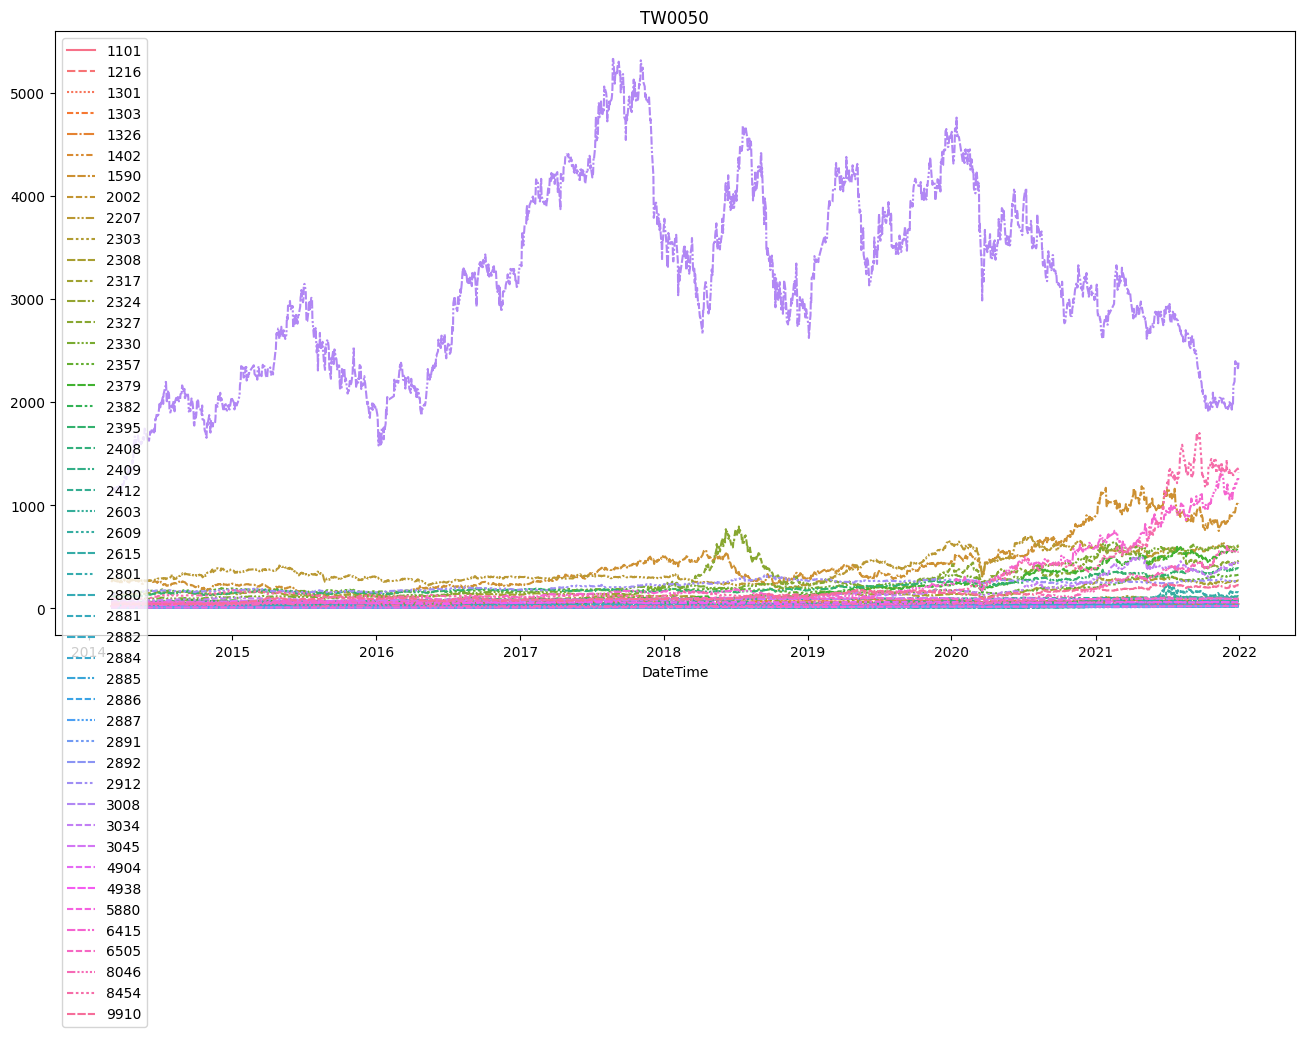

In [5]:
df = pd.read_csv(f'data/{name}.csv',index_col=0) 
df.index = pd.to_datetime(df.index,format='%Y%m%d')
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=df, ax=ax)
plt.title(f'{name}')
plt.legend(loc='upper left')

### Pick DataSet

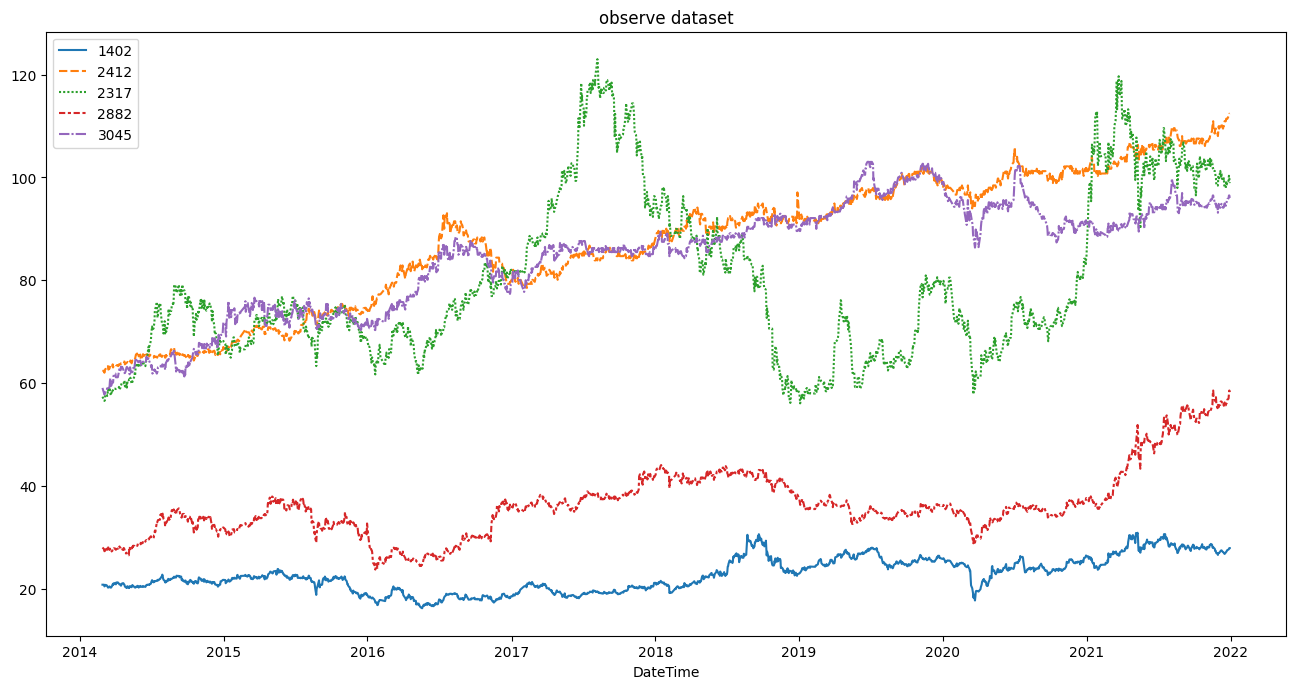

In [70]:
portfolio_set = [ '1402', '2412', '2317', '2882','3045']
dataset = df[portfolio_set]
dataset.index = pd.to_datetime(df.index,format='%Y%m%d')
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=dataset, ax=ax)
plt.title(f'observe dataset')
plt.legend(loc='upper left')

### Read Data & Output Train/Test Data

In [71]:

print('stock set',portfolio_set)
name = Portfolio['name']
print(name)
train_year = ('2018','2020')
test_year = ('2021','2021')
data = pd.read_csv(f'data/{name}.csv',index_col=0)
data = pd.DataFrame(data, index = data.index, columns = data.columns)

# create portfolio dataset
name = 'dataset'
# name = Portfolio['name']
data = data[portfolio_set]
display(data.head())
display(data.describe())

# create train set
train = data.loc[f'{train_year[0]}0101':f'{train_year[1]}1231']
output_path = f'data/{name}_{train_year[0]}_{train_year[1]}.csv'
print('Train Data:',output_path)
train.to_csv(output_path)

# create scaler 
scalerfile = f'scaler/{name}_{train_year[0]}_{train_year[1]}_scaler.sav'
print(scalerfile)
scaler_ = StandardScaler()
scaler = scaler_.fit(train)
pickle.dump(scaler, open(scalerfile, 'wb'))
# scaler = pickle.load(open(scalerfile, 'rb'))

# create scaler 
test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}1231']
output_path = f'data/{name}_{test_year[0]}_{test_year[1]}.csv'
print('Test Data:',output_path)
test.to_csv(output_path)

stock set ['1402', '2412', '2317', '2882', '3045']
TW0050


,1402,2412,2317,2882,3045
DateTime,,,,,
20140227,20.793091,62.496273,57.358025,28.027988,59.064655
20140303,20.793091,62.292480,56.743469,27.714478,58.027294
20140304,20.466667,62.020771,56.538620,27.306915,57.767952
20140305,20.531950,62.428352,56.675194,27.338257,57.962467
20140306,20.629877,62.700062,57.631153,27.902588,58.156967


,1402,2412,2317,2882,3045
count,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,22.746719,87.567442,79.901045,36.498536,84.763050
std,3.342505,13.212891,16.009393,6.688470,10.783040
min,16.210199,62.020771,56.065598,23.732931,57.767952
25%,20.238173,77.266205,68.213058,32.748165,75.246368
50%,22.221334,89.902222,74.719894,35.762390,86.874229
75%,25.293146,98.453911,89.899338,38.768326,92.943542
max,30.898657,112.386345,123.004158,58.563381,103.036964


Train Data: data/dataset_2018_2020.csv
scaler/dataset_2018_2020_scaler.sav
Test Data: data/dataset_2021_2021.csv


### Plot Train & Test 

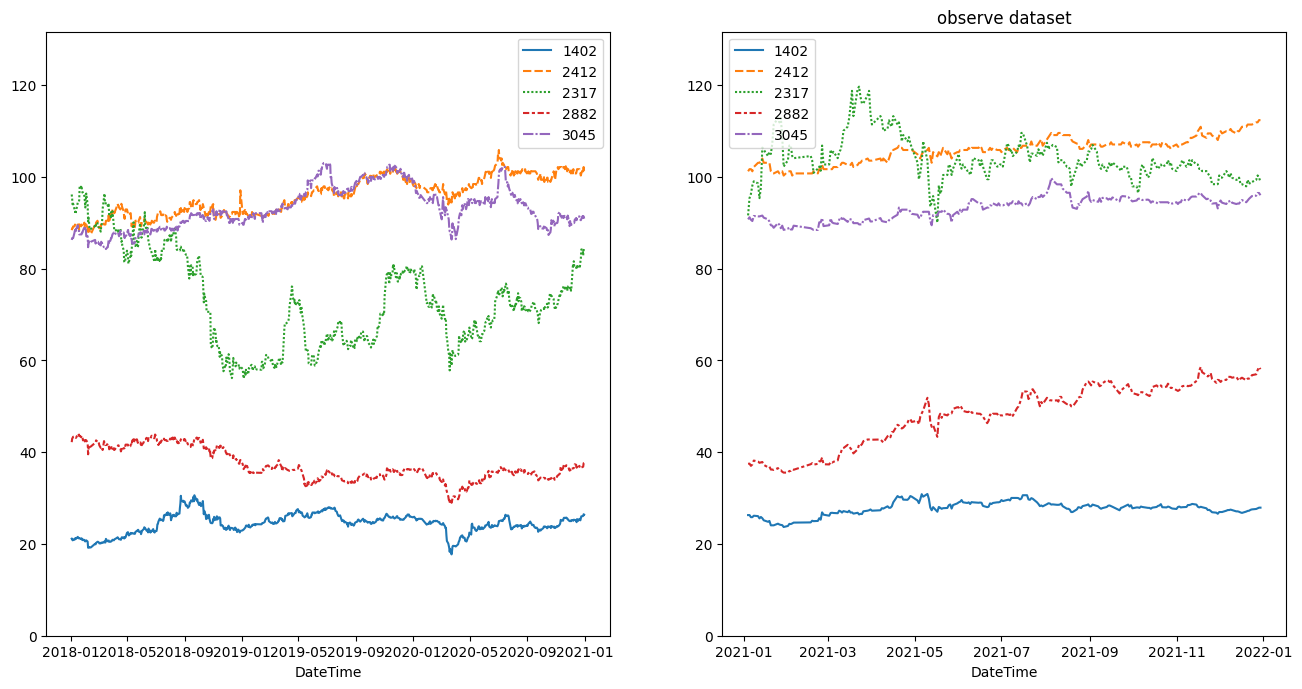

In [72]:
train.index = pd.to_datetime(train.index,format='%Y%m%d')
test.index = pd.to_datetime(test.index,format='%Y%m%d')
y_max = max(max(train.apply(max)),max(test.apply(max)))
y_max = y_max+y_max*0.1
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=100)
sns.lineplot(data=train,ax=ax[0])
sns.lineplot(data=test,ax=ax[1])
ax[0].set_ylim(0,y_max)
ax[1].set_ylim(0,y_max)
plt.title(f'observe dataset')
plt.legend(loc='upper left')

### get stock industry

In [73]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {"dataset": "TaiwanStockInfo"}
translation = requests.get(url, params=parameter)
trans = translation.json()
df_info = pd.DataFrame(trans['data'])
drop_list = ['ETF', '上櫃指數股票型基金(ETF)','受益證券', '指數投資證券(ETN)', '其他', '所有證券 ', '存託憑證','Index', '大盤']
df_info = df_info[df_info['industry_category'].apply(lambda x : x not in drop_list)]
df_info['row'] = df_info.sort_values(['stock_id','industry_category'], ascending=[True,False]).groupby(['stock_id']).cumcount() + 1
df_info = df_info[df_info['row']==1]
df_info = df_info[['stock_id','stock_name','industry_category']]
df_info = df_info.rename(columns={'stock_id':'code','stock_name':'name','industry_category':'c_name'})
# df_info = df_info[df_info['code'].apply(lambda x : x in Portfolio['portfolio'])]
df_info = df_info[df_info['code'].apply(lambda x : x in train.columns)]

output_path = f'data/{name}_table.csv'
df_info.to_csv(output_path,index=False)
df_info

,code,name,c_name
369,1402,遠東新,紡織纖維
691,2317,鴻海,電子工業
836,2412,中華電,電子工業
1114,2882,國泰金,金融保險
1244,3045,台灣大,電子工業
